# 01 Import libraries

In [3]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [5]:
# Create path
path = r'C:\Users\shaiv\Downloads\Instacart Basket Analysis'
path

'C:\\Users\\shaiv\\Downloads\\Instacart Basket Analysis'

In [7]:
# Importing recent project data
ords_prods_custs = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'ords_prods_custs_merge.pkl'))

In [10]:
ords_prods_custs.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,first_order,product_id,add_to_cart_order,reordered,...,frequency_flag,First Name,Last Name,Gender,State,Age,Date Joined,Number of dependents,Family Status,Income
0,2539329,1,1,2,8,NaN,True,196,1,0,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
1,2539329,1,1,2,8,NaN,True,14084,2,0,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
2,2539329,1,1,2,8,NaN,True,12427,3,0,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
3,2539329,1,1,2,8,NaN,True,26088,4,0,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
4,2539329,1,1,2,8,NaN,True,26405,5,0,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423


# 03 Create a histogram of the “order_hour_of_day” column

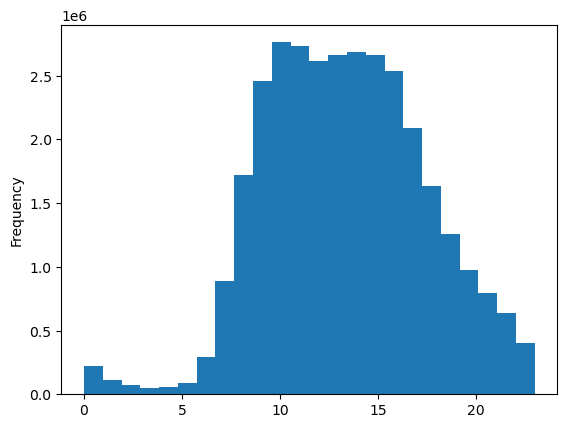

In [12]:
hist = ords_prods_custs['order_hour_of_day'].plot.hist(bins = 24)

##### The histogram reveals peaks at specific hours, highlighting the times when the highest volume of orders is placed. For instance, peaks around midday or early evening may suggest that customers tend to shop during lunch breaks or after work. The overall shape of the distribution provides insight into ordering patterns—whether they are concentrated within certain time periods or spread out more evenly throughout the day. A normal distribution would indicate consistent shopping habits centered around a specific time, whereas a skewed distribution might point to a preference for particular times, such as afternoons or evenings.

# 04 Create a bar chart from the “loyalty_flag” column

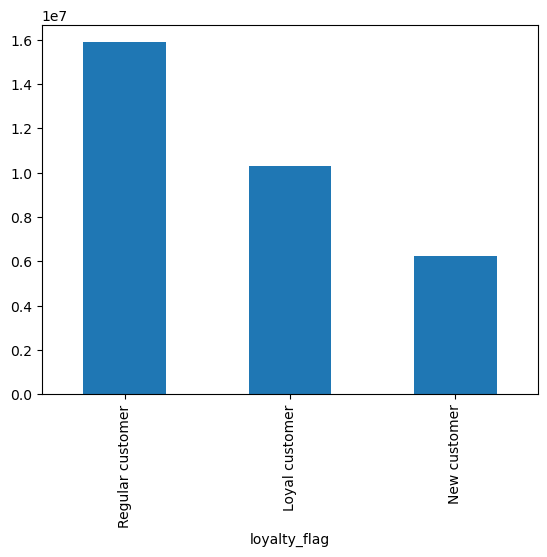

In [16]:
bar = ords_prods_custs['loyalty_flag'].value_counts().plot.bar()

##### From bar chart we can say that regular customer are placing more orders.

# 05 Check whether there’s a difference in expenditure (the “prices” column) depending on the hour of the day

In [21]:
# Create a random sample by generating a seed
np.random.seed(4)

In [23]:
# Create a dev list based on the data split we want (70/30)
dev = np.random.rand(len(ords_prods_custs)) <= 0.7

In [25]:
# Spliting the dataframe in two samples
big = ords_prods_custs[dev]
small = ords_prods_custs[~dev]

In [26]:
# Compare length of dataframe before split
len(ords_prods_custs)

32404859

In [29]:
# Compare length of dataframe after split
len(ords_prods_custs)

32404859

##### Length of dataframe is same before and after split.

In [32]:
# Reducing the small sample to only columns needed
ords_prods_custs_reduce = small[['order_hour_of_day', 'prices']]

In [34]:
ords_prods_custs_reduce.head()

,order_hour_of_day,prices
0,8,9.0
2,8,4.4
3,8,4.7
6,7,3.0
10,7,4.0


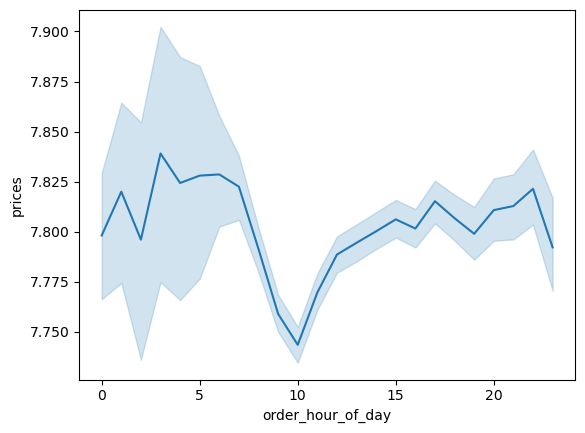

In [36]:
# Line chart
line = sns.lineplot(data = ords_prods_custs_reduce, x = 'order_hour_of_day', y = 'prices')

##### Least expensive items are brought from early morning to noon

# 06 Determine whether there’s a connection between age and family situation by creating a line chart exploring the connections between age and number of dependents

In [42]:
# Reducing the small sample to only columns needed
ords_prods_custs_reduce2 = small[['Age','Number of dependents']]

In [44]:
ords_prods_custs_reduce2.head()

,Age,Number of dependents
0,31,3
2,31,3
3,31,3
6,31,3
10,31,3


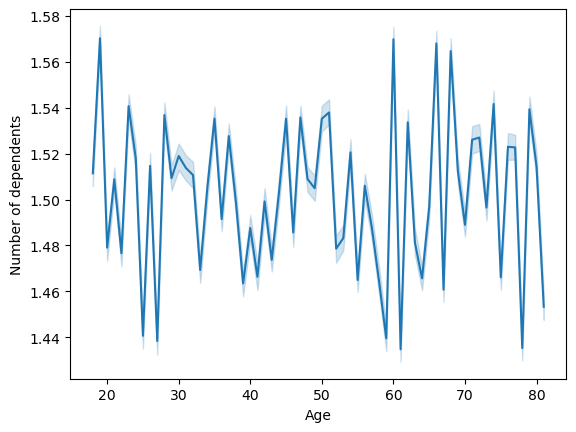

In [46]:
# Line chart
line_2 = sns.lineplot(data = ords_prods_custs_reduce2, x = 'Age', y = 'Number of dependents')

##### There are no clear correlation that would indicate a strong relationship between age and the number of dependents; for example, the line does not consistently go up or down as age increases.

# 07 Create a scatterplot to explore whether there’s a connection between age and spending power (income)

In [50]:
# Reducing the small sample to only columns needed
ords_prods_custs_reduce3 = small[['Age','Income']]

In [52]:
ords_prods_custs_reduce3.head()

,Age,Income
0,31,40423
2,31,40423
3,31,40423
6,31,40423
10,31,40423


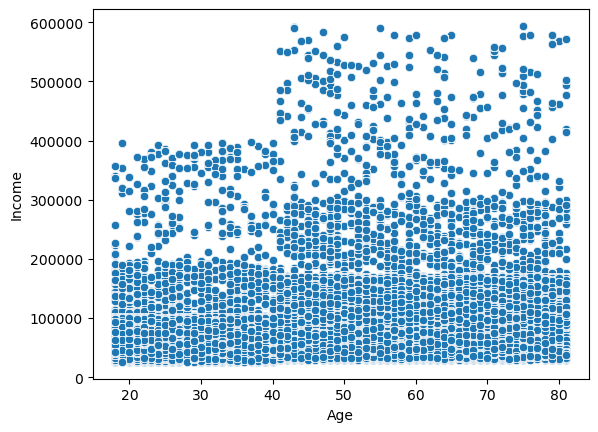

In [58]:
# Scatterplot
scatter = sns.scatterplot(x = 'Age', y = 'Income',data = ords_prods_custs_reduce3)

##### The scatterplot shows a wide variation in incomes among younger age groups, particularly between ages 20 and 40, with a noticeable concentration in the lower income brackets. From around age 40 onward, there appears to be a clear upward trend, with data points increasingly concentrated in higher income ranges. This suggests that income tends to rise with age. The densest cluster for individuals over 40 is significantly higher on the income scale compared to those under 40, indicating a potential increase in median income as age advances. While the scatterplot visually highlights these trends, further statistical analysis would be necessary to confirm correlations and uncover the nuances of the relationship between age and income among the customers.

# 08 Export your visualizations as “.png” files

In [62]:
# Histogram plot
hist.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'hist_order_hour_of_day_frequency.png'))

In [64]:
# Bar chart
bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'loyalty_flag_distribution.png'))

In [66]:
# 1st Line chart
line.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'change_in_price_over_hours_of_the_day.png'))

In [68]:
# 2nd line chart
line_2.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'age_vs_no_of_dependants.png'))

In [70]:
# Scatterplot
scatter.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'change_in_spending_power_over_age.png'))